<a href="https://colab.research.google.com/github/tusharpoddar/e-Science-Research/blob/master/GoogleDrive/Cluster_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following notebook is used to plot the cluter plot using matplotlib OffsetBox. 
It plots the most simple cluster plot with 6 sounds generated by mice and 6 random noise together to see if the matplotlib offsetbox is able to distinguish between them. 
The following code uses the tf-records and the numpy array for the offsetbox plot. The numpy array actually plots the spectrograms and the tf-records are  used to specify the location of each spectrogram. 

# Why is this notebook useful?
Since this notebook does not plot a lot of data, it is difficult to  see the results properly. So this notebook can be used as a dummy example to plot the spectrograms on a cluster plot.

## Next steps - 
Since this notebook does not plot a lot of data. So it is difficult to  see the results properly. So this notebook can be used as a dummy example to plot the spectrograms on a cluster plot. This notebook is then used to plot the final cluster plots that plots 1700 spectrograms on the cluster plot at the same time. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [3]:
# the following code loads the 3d numpy array output that we get from the 
# file vggish_input.py 
# the shape of this array is [num_examples, num_frames, num_bands]
vggish_output_array = np.load('/content/gdrive/Shared drives/Research/Data/Numpy files/git2min6sec-spectrogram.npy') # the bigger array 

In [4]:
vggish_output_array.shape

(5637, 96, 64)

In [5]:
l = vggish_output_array.shape
observations = l[0]
# represents the 96 frames that divide one window. 
timeStamps = l[1]
freq = l[2]

In [6]:
# Making the array that we need to work with
vggish_reshape_array = np.reshape(vggish_output_array, (observations * timeStamps, freq))
vggish_transpose_array = vggish_reshape_array.T
print(vggish_transpose_array.shape)


(64, 541152)


In [8]:
# i need to add in the times for the the noise, these are dirrectly from the selection table
times = [52.36087475, 56.13919295, 121.0993401, 121.1951882, 56.5877036, 121.2984868, 52, 56, 121,40,70, 80]
# plot them to see if they are the same or not


In [9]:
# the thing that I need to plot
# the following function takes in two inputs 
# 1. times - the array that stores all the times from the selection table 
# 2. input_array - the transposed and reshaped array that we receive from the vggish_input file. 

def spectrogram_data_storage_helper_function(times, input_array):
    
    result = []
    for time in times:
        time_to_see = float(time) / 1000 #to convert to seconds 
        freqs_to_see = float(time) / 10
        
        bound1 = int(freqs_to_see - 10)
        bound2 = int(freqs_to_see + 10)

        result.append(input_array[:, bound1: bound2])
        # returns the array that has data for the spectrogram 
    return result

In [10]:
# this represents the data that needs to be plotted using matplotlib offsetbox
plotting_data = spectrogram_data_storage_helper_function(times, vggish_transpose_array)

In [11]:
# reading the contents of the tf records that we get as output for the 
# vggish_inference_demo.py.

# NOTE - In order to get these we need to have 64 mel bins instead of the 512 that we were using because the use
# 64 in the vggiish_sliim module. The program still runs with the updated
tfrecords_filename = '/content/gdrive/Shared drives/Research/Data/Tf-records/gitSpectrogrram.tfrecords'
record_iterator = tf.compat.v1.python_io.tf_record_iterator(path=tfrecords_filename)
string_record = next(record_iterator)
example = tf.train.SequenceExample()
example.ParseFromString(string_record)

f = example.feature_lists.feature_list['audio_embedding']

hexembed = f.feature[59].bytes_list.value[0].hex()

vggish_embed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]



Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [12]:
len(vggish_embed) 

128

In [13]:
# earlier we had just 60 cases but now we have more but for now we are just taking the first 60
tf_records_array = []
for x in range(0, 5637):
    temp = f.feature[x].bytes_list.value[0].hex()
    tf_records_array.append([int(temp[i:i+2],16) for i in range(0,len(temp),2)])

In [14]:
# this is the code needed to get the length of the tf records in a file
temp = len(f.feature)
print(temp)

5637


In [15]:
tf_records_array = np.array(tf_records_array)
tf_records_array.shape

(5637, 128)

# Printing the data after the PCA and before it to see how it changes. 

In [16]:
# trying to analyse the tf records to see if their value before the pca was different to that after the pca and if we are losing any data or not 
print(tf_records_array[1, :])

[162   5 146 103 170  62  62  75 138 255 112  29  50  88  46  30  45 150
 134  99  90 130 175   8 184  83 159 206  46 112 125  88 174   0 138 217
 162   5   0  88  72 219  57  42 255 179 188 117  34 210 168 134 159 169
 175 173 222  13  45 164 168 121   0 225  15 166 159  68 116 157  14  54
 120  50  51   0  89 239 255 148  99 123 198  80  97 212  25  54 195 255
 131 224  84  19 156 245 152 190  66 134 151 147 108  37  74 175 172 119
 255 255 227 120 110  99 255 152 255  13   0 255   0  70   0 245 210  39
  17 255]


In [17]:
print(tf_records_array[2000, :])

[162   5 146 103 170  62  62  75 138 255 112  29  50  88  46  30  45 150
 134  99  90 130 175   8 184  83 159 206  46 112 125  88 174   0 138 217
 162   5   0  88  72 219  57  42 255 179 188 117  34 210 168 134 159 169
 175 173 222  13  45 164 168 121   0 225  15 166 159  68 116 157  14  54
 120  50  51   0  89 239 255 148  99 123 198  80  97 212  25  54 195 255
 131 224  84  19 156 245 152 190  66 134 151 147 108  37  74 175 172 119
 255 255 227 120 110  99 255 152 255  13   0 255   0  70   0 245 210  39
  17 255]


In [18]:
# doing PCA decomposition of the numpy array answer 
pca = decomposition.PCA()
pca.fit(tf_records_array)
print(pca)

# applying dimentionaly reduction to that array 
transformed_data = pca.transform(tf_records_array)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [19]:
print(transformed_data.shape)
print(transformed_data[1, :])

(5637, 128)
[ 2.60138991e-01 -7.04976307e-01  3.17417917e-01 -1.04444756e-02
 -2.54611066e-02 -3.33747725e-03 -1.95093872e-02 -9.77381235e-03
  4.84701638e-03  1.47719933e-04 -3.62838216e-04 -1.80721782e-03
  1.25973420e-03  3.95800843e-04 -1.42862304e-04  6.29243052e-04
  3.73800649e-04 -8.82423456e-05  4.27331536e-05  1.56135736e-04
  1.54597336e-14 -6.30102696e-18 -3.78243379e-17 -5.69774567e-18
  4.94690356e-17  6.97865426e-18 -5.92676758e-17 -5.81593448e-17
 -8.45363873e-17 -1.27106011e-16  7.72440875e-18 -3.30410548e-17
  2.27218511e-18 -2.60845345e-17 -1.91521360e-17 -1.66939489e-21
 -2.35501268e-18 -1.34423674e-17 -6.59589048e-18 -4.58435328e-17
 -2.97787146e-18 -8.83887546e-17  3.72403392e-17  4.32337729e-17
  3.79349354e-17  2.09779329e-17  5.07468532e-17  2.68749010e-17
  2.73123354e-17 -4.71951280e-17 -1.53559964e-17  6.03086065e-17
  1.45890787e-16  5.57646308e-18  7.65125485e-17 -1.16282135e-18
 -1.06051029e-17 -3.48142815e-18 -6.81313125e-31 -1.38724745e-32
  1.08197578e

In [20]:
print(transformed_data[2000, :])

[ 2.60138991e-01 -7.04976307e-01  3.17417917e-01 -1.04444756e-02
 -2.54611066e-02 -3.33747725e-03 -1.95093872e-02 -9.77381235e-03
  4.84701638e-03  1.47719933e-04 -3.62838216e-04 -1.80721782e-03
  1.25973420e-03  3.95800843e-04 -1.42862304e-04  6.29243052e-04
  3.73800649e-04 -8.82423456e-05  4.27331536e-05  1.56135736e-04
  1.54597336e-14 -6.30102696e-18 -3.78243379e-17 -5.69774567e-18
  4.94690356e-17  6.97865426e-18 -5.92676758e-17 -5.81593448e-17
 -8.45363873e-17 -1.27106011e-16  7.72440875e-18 -3.30410548e-17
  2.27218511e-18 -2.60845345e-17 -1.91521360e-17 -1.66939489e-21
 -2.35501268e-18 -1.34423674e-17 -6.59589048e-18 -4.58435328e-17
 -2.97787146e-18 -8.83887546e-17  3.72403392e-17  4.32337729e-17
  3.79349354e-17  2.09779329e-17  5.07468532e-17  2.68749010e-17
  2.73123354e-17 -4.71951280e-17 -1.53559964e-17  6.03086065e-17
  1.45890787e-16  5.57646308e-18  7.65125485e-17 -1.16282135e-18
 -1.06051029e-17 -3.48142815e-18 -6.81313125e-31 -1.38724745e-32
  1.08197578e-32  3.87940

# Conclusion -  So from the above values of the data before the PCA and after the PCA we get to know that the data is not lost after the PCA, the data is coming out to be the same from the befining only.

In [21]:
# selecting all the rows for the first 2 columns 
# here colum 2 is not selected and only 0, 1 colum is selected 
# we are selecting only 2 columns becasue we need to plot the data on a 2d graph. 

X_transformed = transformed_data[:,0:2]

In [22]:
from matplotlib import offsetbox

def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)
    
    
    # this is the main plot that is being plotted
    plt.figure(figsize=(20,20))
    
    # creating subplots of all the iimages that need to be positioned
    ax = plt.subplot(111)
    for i in range(X_transformed.shape[0]):
        
        # the following if condition is to give the plot a title in this case we are giving it 'o'
        if y is None:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            # if np.min(dist) < 4e-30:
                # don't show points that are too close
                # continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            imagebox = offsetbox.AnnotationBbox(
                # because the X is of the shape (?, 96, 64)
                offsetbox.OffsetImage(X[i, :, :].T, cmap=plt.cm.gray_r),
                X_transformed[i])
            
            # addinig the images to the ax or the subplots created for the main matplotlib
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [23]:
from matplotlib import offsetbox
import matplotlib
# in this code i am trying to add the text instead of the images so that I have more space for the images and they dont overlap
def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)
    
    
    # this is the main plot that is being plotted
    plt.figure(figsize=(5,5))
    
    # creating subplots of all the iimages that need to be positioned
    ax = plt.subplot(111)
    for i in range(X_transformed.shape[0]):
        
        # the following if condition is to give the plot a title in this case we are giving it 'o'
        if y is None:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            # if np.min(dist) < 4e-30:
                # don't show points that are too close
                # continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            # imagebox = offsetbox.AnnotationBbox(
            #     # because the X is of the shape (?, 96, 64)
            #     offsetbox.OffsetImage(X[i, :, :].T, cmap=plt.cm.gray_r), # this is the offsetbox that is the first parameter that is required to 
            #     X_transformed[i]) # this parameter is used to find the position where the spectrogram is plotted
            print(X_transformed[i], i)
            number = matplotlib.text.Annotation(i, X_transformed[i])
            
            # addinig the images to the ax or the subplots created for the main matplotlib
            ax.add_artist(number)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Streaming output truncated to the last 5000 lines.
[0.36591059 0.88488167] 638
[0.40972182 0.60240902] 639
[0.36591059 0.88488167] 640
[0.36591059 0.88488167] 641
[0.36591059 0.88488167] 642
[0.40972182 0.60240902] 643
[0.35075626 0.00254949] 644
[0.35075626 0.00254949] 645
[0.04381122 0.32575253] 646
[0.71666685 0.27920598] 647
[0.71666685 0.27920598] 648
[0.71666685 0.27920598] 649
[0.71666685 0.27920598] 650
[0.71666685 0.27920598] 651
[0.40972182 0.60240902] 652
[0.40972182 0.60240902] 653
[0.40972182 0.60240902] 654
[0.40972182 0.60240902] 655
[0.40972182 0.60240902] 656
[0.48071694 0.96519757] 657
[0.36591059 0.88488167] 658
[0.36591059 0.88488167] 659
[0.36591059 0.88488167] 660
[0.04381122 0.32575253] 661
[0.40972182 0.60240902] 662
[0.71666685 0.27920598] 663
[0.71666685 0.27920598] 664
[0.35075626 0.00254949] 665
[0.35075626 0.00254949] 666
[0.40972182 0.60240902] 667
[0.40972182 0.60240902] 668
[0.40972182 0.60240902] 669
[0.         0.60822519] 670
[0.         0.60822519] 6

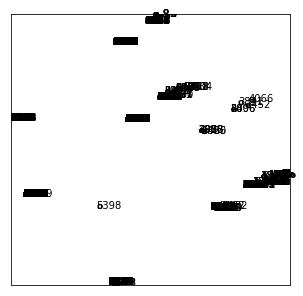

In [24]:
# clearly this plot is different from the one that was plotted earlier without changing the parameters and 
plot_embedding(X_transformed, vggish_output_array)

In [25]:
# selecting only the spectrograms that have been listed in the selection table. But plotting the 0.96 sec window
# insead of the smaller windows to make clustering better. 
plotting_tf_records = [tf_records_array[int(float(time) / 0.0225)] for time in times]

plotting_tf_records = np.array(plotting_tf_records)

In [26]:
plotting_tf_records.shape

(12, 128)

In [27]:
# doing PCA decomposition of the numpy array answer 
pca = decomposition.PCA()
pca.fit(plotting_tf_records)
print(pca)

# applying dimentionaly reduction to that array 
transformed_data = pca.transform(plotting_tf_records)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [28]:
# selecting all the rows for the first 2 columns 
# here colum 2 is not selected and only 0, 1 colum is selected 
# we are selecting only 2 columns becasue we need to plot the data on a 2d graph. 

X_transformed = transformed_data[:,0:2]

In [29]:
X_transformed.shape

(12, 2)

In [30]:
# for without the pca tf records
tf_records_array.shape

(5637, 128)

In [31]:
plotting_spectrograms = [vggish_output_array[int(float(time) / 0.0225), :, :] for time in times]
plotting_spectrograms = np.array(plotting_spectrograms)

In [32]:
plotting_spectrograms.shape

(12, 96, 64)

[0.         0.09476568] 0
[0.95026035 0.        ] 1
[0.95026035 0.        ] 2
[0.47513018 0.04738284] 3
[1.         0.90523432] 4
[0.95026035 0.        ] 5
[0.04973965 1.        ] 6
[0.         0.09476568] 7
[0.47513018 0.04738284] 8
[0.         0.09476568] 9
[0.         0.09476568] 10
[0.         0.09476568] 11


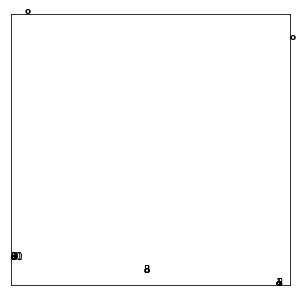

In [33]:
plot_embedding(X_transformed, plotting_spectrograms)

In [ ]:
plotting_tf_records
plot_embedding(plotting_tf_records[:, 0:2], plotting_spectrograms)

In [35]:
for temp in plotting_tf_records[:, 0:2]:
  print(temp)

[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]
[162   5]


In [36]:
for temp in X_transformed:
  print(temp)

[-0.59995155 -0.1227116 ]
[ 0.81040319 -0.22711231]
[ 0.81040319 -0.22711231]
[ 0.10522582 -0.17491196]
[0.88422564 0.77015909]
[ 0.81040319 -0.22711231]
[-0.5261291  0.8745598]
[-0.59995155 -0.1227116 ]
[ 0.10522582 -0.17491196]
[-0.59995155 -0.1227116 ]
[-0.59995155 -0.1227116 ]
[-0.59995155 -0.1227116 ]
